#### Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved.
#### Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=share_link








In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
heart_df = pd.read_csv("dataset.csv")

# Display the first few rows of the dataset
print(heart_df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


#### Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.

In [2]:
# Handle missing values
heart_df = heart_df.dropna()

# Encoding categorical variables
label_encoder = LabelEncoder()
heart_df['sex'] = label_encoder.fit_transform(heart_df['sex'])
heart_df['cp'] = label_encoder.fit_transform(heart_df['cp'])
heart_df['fbs'] = label_encoder.fit_transform(heart_df['fbs'])
heart_df['restecg'] = label_encoder.fit_transform(heart_df['restecg'])
heart_df['exang'] = label_encoder.fit_transform(heart_df['exang'])
heart_df['slope'] = label_encoder.fit_transform(heart_df['slope'])
heart_df['ca'] = label_encoder.fit_transform(heart_df['ca'])
heart_df['thal'] = label_encoder.fit_transform(heart_df['thal'])

# Scaling numerical features
scaler = StandardScaler()
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
heart_df[numerical_features] = scaler.fit_transform(heart_df[numerical_features])

# Separate features and target variable
X = heart_df.drop(columns=['target'])
y = heart_df['target']


#### Q2. Split the dataset into a training set (70%) and a test set (30%).

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.


In [4]:
# Train the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

#### Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [5]:
# Make predictions
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8131868131868132
Precision: 0.8367346938775511
Recall: 0.82
F1 Score: 0.8282828282828283


#### Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

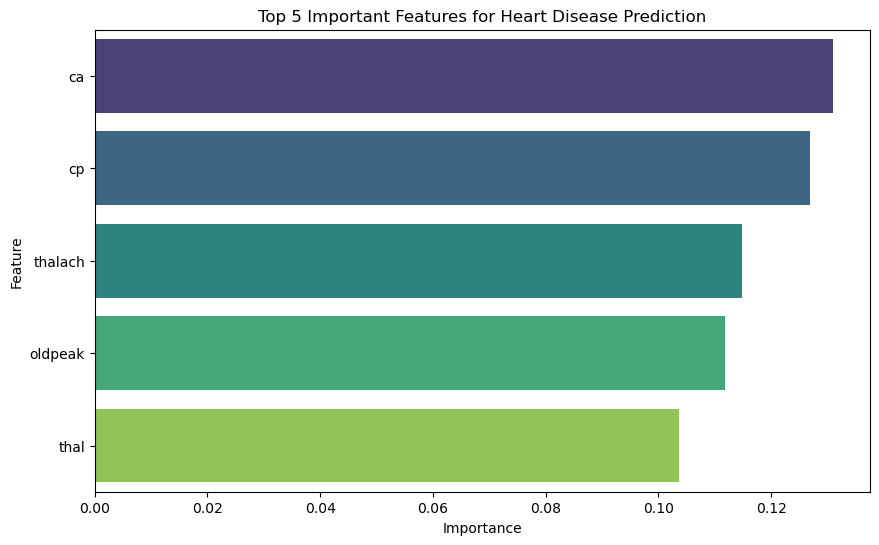

In [6]:
# Get feature importances
importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
top_features = feature_importance_df.nlargest(5, 'Importance')

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top 5 Important Features for Heart Disease Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


#### Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [7]:
# Define hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_rf_classifier = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_rf_classifier.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

print("Best Model Performance:")
print("Accuracy:", accuracy_best)
print("Precision:", precision_best)
print("Recall:", recall_best)
print("F1 Score:", f1_best)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best Model Performance:
Accuracy: 0.8131868131868132
Precision: 0.8235294117647058
Recall: 0.84
F1 Score: 0.8316831683168315


#### Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

In [8]:

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("Best Model Performance:")
print("Accuracy:", accuracy_best)
print("Precision:", precision_best)
print("Recall:", recall_best)
print("F1 Score:", f1_best)



Accuracy: 0.8131868131868132
Precision: 0.8367346938775511
Recall: 0.82
F1 Score: 0.8282828282828283
Best Model Performance:
Accuracy: 0.8131868131868132
Precision: 0.8235294117647058
Recall: 0.84
F1 Score: 0.8316831683168315


#### Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

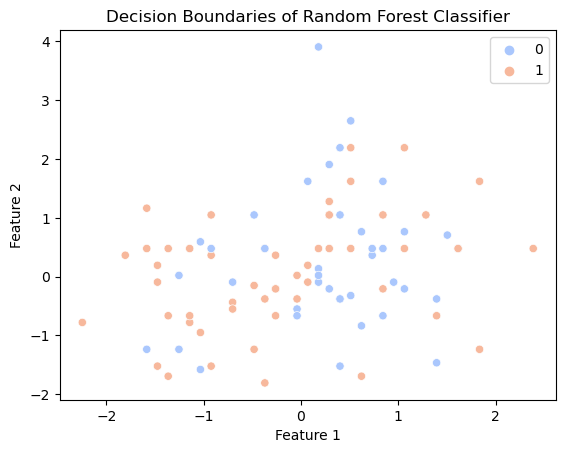

In [9]:
# Plot decision boundaries using only two features (top 2 important features)
sns.scatterplot(x=X_test.iloc[:, 0], y=X_test.iloc[:, 3], hue=y_pred_best, palette='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries of Random Forest Classifier')
plt.show()